<a href="https://colab.research.google.com/github/datavers/portfolio_idea/blob/dataloading/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning the git repository - Initial step

In [1]:
! git clone https://github.com/datavers/portfolio_idea.git

Cloning into 'portfolio_idea'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 2), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), done.
Resolving deltas: 100% (2/2), done.


In [2]:
import os

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
print("Jelenlegi munkakönyvtár:", os.getcwd())

Jelenlegi munkakönyvtár: /content


In [4]:
os.chdir('/content/portfolio_idea/')

In [5]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import yfinance as yf

In [ ]:
! git branch -r

  origin/HEAD -> origin/main
  origin/dataloading
  origin/main


In [ ]:
! git switch dataloading

Branch 'dataloading' set up to track remote branch 'dataloading' from 'origin'.
Switched to a new branch 'dataloading'


In [ ]:
! git pull

Already up to date.


## Import the sector ETFs and other instrumentums

In [ ]:
sector_data = yf.download('XLE XLB XLI XLU XLV XLF XLY XLP VGT VOX VNQ BTC-USD', start='2020-01-01', group_by='ticker')

[*********************100%%**********************]  12 of 12 completed


In [ ]:
# Kiválasztjuk az összes 'Close' oszlopot
close_prices = sector_data.xs('Close', level=1, axis=1)

# Az oszlopok átnevezése a ticker nevére
close_prices.columns = close_prices.columns.get_level_values(0)

# Eredmény megjelenítése
print(close_prices)

Ticker             XLI        XLE         VGT        XLB         VOX  \
Date                                                                   
2020-01-01         NaN        NaN         NaN        NaN         NaN   
2020-01-02   83.010002  60.580002  249.339996  60.700001   95.019997   
2020-01-03   82.849998  60.400002  246.720001  59.720001   94.639999   
2020-01-04         NaN        NaN         NaN        NaN         NaN   
2020-01-05         NaN        NaN         NaN        NaN         NaN   
...                ...        ...         ...        ...         ...   
2024-08-01  125.489998  90.739998  547.479980  91.769997  136.759995   
2024-08-02  122.730003  88.400002  534.049988  90.040001  133.860001   
2024-08-03         NaN        NaN         NaN        NaN         NaN   
2024-08-04         NaN        NaN         NaN        NaN         NaN   
2024-08-05  120.355003  86.515900  512.815002  87.860001  129.778000   

Ticker            VNQ        XLP        XLU        XLF         

In [ ]:
# Hétvégi BTC árak kiszűrése

# Sorok kiszűrése, ahol a 'GOVT' oszlopban null értékek vannak
filtered_df = close_prices.dropna(subset=['VNQ'])

# Szűrt DataFrame megjelenítése
print("\nSzűrt DataFrame:")
print(filtered_df)


Szűrt DataFrame:
Ticker             XLI        XLE         VGT        XLB         VOX  \
Date                                                                   
2020-01-02   83.010002  60.580002  249.339996  60.700001   95.019997   
2020-01-03   82.849998  60.400002  246.720001  59.720001   94.639999   
2020-01-06   82.879997  60.869999  247.539993  59.459999   95.760002   
2020-01-07   82.709999  60.709999  247.509995  59.389999   95.820000   
2020-01-08   82.989998  59.709999  250.119995  59.599998   96.309998   
...                ...        ...         ...        ...         ...   
2024-07-30  126.449997  92.820000  548.809998  91.190002  135.240005   
2024-07-31  127.860001  93.209999  568.010010  92.139999  136.380005   
2024-08-01  125.489998  90.739998  547.479980  91.769997  136.759995   
2024-08-02  122.730003  88.400002  534.049988  90.040001  133.860001   
2024-08-05  120.355003  86.515900  512.815002  87.860001  129.778000   

Ticker            VNQ        XLP        XLU  

In [ ]:
# Egyéb eszközosztályok adatainak a betöltése
other_tickers = yf.download('GLD GOVT', start='2020-01-01', group_by='ticker')

[*********************100%%**********************]  2 of 2 completed


In [ ]:
# Kiválasztjuk az összes 'Close' oszlopot
close_prices_other = other_tickers.xs('Close', level=1, axis=1)

# Az oszlopok átnevezése a ticker nevére
close_prices_other.columns = close_prices_other.columns.get_level_values(0)

# Eredmény megjelenítése
print(close_prices_other)

Ticker             GLD       GOVT
Date                             
2020-01-02  143.949997  25.990000
2020-01-03  145.860001  26.120001
2020-01-06  147.389999  26.090000
2020-01-07  147.970001  26.040001
2020-01-08  146.860001  26.000000
...                ...        ...
2024-07-30  222.520004  22.879999
2024-07-31  226.550003  23.010000
2024-08-01  225.770004  23.040001
2024-08-02  225.339996  23.350000
2024-08-05  222.839996  23.385000

[1155 rows x 2 columns]


In [ ]:
# Hétvégi BTC árak kiszűrése

# Sorok kiszűrése, ahol a 'GOVT' oszlopban null értékek vannak
filtered_df = close_prices_other.dropna(subset=['GOVT'])

# Szűrt DataFrame megjelenítése
print("\nSzűrt DataFrame:")
print(filtered_df)


Szűrt DataFrame:
Ticker             GLD       GOVT
Date                             
2020-01-02  143.949997  25.990000
2020-01-03  145.860001  26.120001
2020-01-06  147.389999  26.090000
2020-01-07  147.970001  26.040001
2020-01-08  146.860001  26.000000
...                ...        ...
2024-07-30  222.520004  22.879999
2024-07-31  226.550003  23.010000
2024-08-01  225.770004  23.040001
2024-08-02  225.339996  23.350000
2024-08-05  222.839996  23.385000

[1155 rows x 2 columns]


In [ ]:
sp500 = yf.Ticker('SPY')

In [ ]:
sp500_hist = sp500.history(start='2020-01-01')

In [ ]:
sp500_hist = sp500_hist['Close']

## Correlation analysis

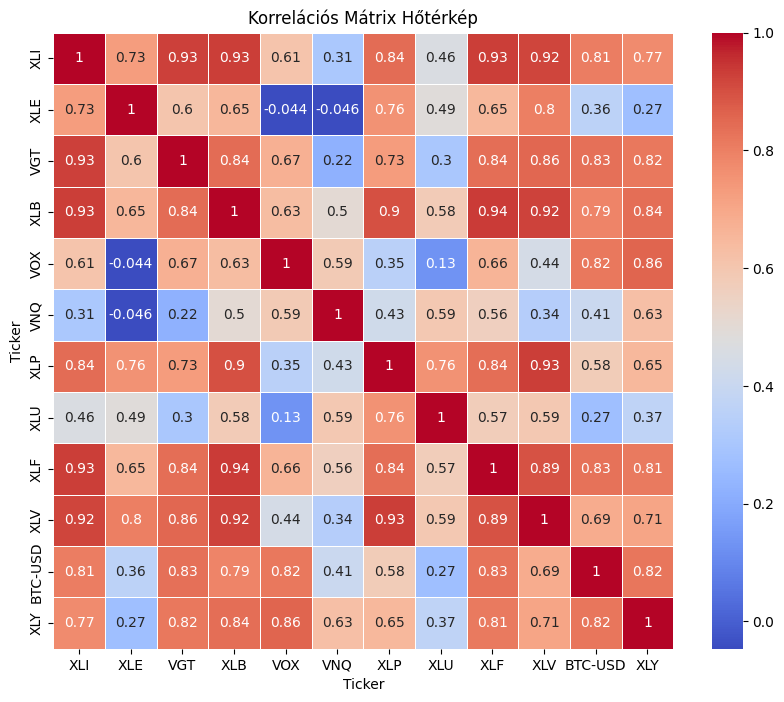

In [ ]:
# Létrehozzuk a hőtérképet
corr_matrix = close_prices.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelációs Mátrix Hőtérkép')
plt.show()

In [ ]:
from itertools import combinations

# Határérték az erős korrelációra
threshold = 0.45

# Oszlopnevek lekérése
columns = corr_matrix.columns

# Lehetséges hármas kombinációk létrehozása
combs = combinations(columns, 3)

# Hármas kombinációk szűrése a korrelációs értékek alapján
selected_combinations = []
for comb in combs:
    if all(corr_matrix.loc[comb[i], comb[j]] < threshold for i in range(3) for j in range(i+1, 3)):
        selected_combinations.append(comb)

# Megjelenítjük azokat a hármas kombinációkat, amelyek megfelelnek a feltételnek
print("Hármas kombinációk, amelyek korrelációi 0.5 alatt vannak:")
print(selected_combinations)

Hármas kombinációk, amelyek korrelációi 0.5 alatt vannak:
[('XLE', 'VNQ', 'BTC-USD')]


In [ ]:
# Új dataset készítése, ami már csak a kiválasztott 3-as csoportot tartalmazza
filtered_close_prices = close_prices[['XLE', 'VNQ', 'BTC-USD']]
print("Szűrt DataFrame:")
print(filtered_close_prices)

Szűrt DataFrame:
Ticker            XLE        VNQ       BTC-USD
Date                                          
2020-01-01        NaN        NaN   7200.174316
2020-01-02  60.580002  91.699997   6985.470215
2020-01-03  60.400002  92.269997   7344.884277
2020-01-04        NaN        NaN   7410.656738
2020-01-05        NaN        NaN   7411.317383
...               ...        ...           ...
2024-08-01  90.739998  91.320000  65357.500000
2024-08-02  88.400002  91.269997  61415.066406
2024-08-03        NaN        NaN  60680.093750
2024-08-04        NaN        NaN  58116.976562
2024-08-05  86.515900  88.919998  53039.265625

[1679 rows x 3 columns]


In [ ]:
filtered_close_prices.corr()

Ticker,XLE,VNQ,BTC-USD
Ticker,,,
XLE,1.000000,-0.046329,0.361251
VNQ,-0.046329,1.000000,0.405020
BTC-USD,0.361251,0.405020,1.000000


In [ ]:
# A DataFrame-ek összeillesztése közös index alapján
df_combined = pd.merge(filtered_close_prices, filtered_df, left_index=True, right_index=True, suffixes=('_close', '_filtered'))

# Eredmény megjelenítése
print("\nÖsszeillesztett DataFrame:")
print(df_combined)


Összeillesztett DataFrame:
Ticker            XLE        VNQ       BTC-USD         GLD       GOVT
Date                                                                 
2020-01-02  60.580002  91.699997   6985.470215  143.949997  25.990000
2020-01-03  60.400002  92.269997   7344.884277  145.860001  26.120001
2020-01-06  60.869999  92.379997   7769.219238  147.389999  26.090000
2020-01-07  60.709999  91.349998   8163.692383  147.970001  26.040001
2020-01-08  59.709999  91.629997   8079.862793  146.860001  26.000000
...               ...        ...           ...         ...        ...
2024-07-30  92.820000  90.730003  66201.015625  222.520004  22.879999
2024-07-31  93.209999  90.410004  64619.250000  226.550003  23.010000
2024-08-01  90.739998  91.320000  65357.500000  225.770004  23.040001
2024-08-02  88.400002  91.269997  61415.066406  225.339996  23.350000
2024-08-05  86.515900  88.919998  53039.265625  222.839996  23.385000

[1155 rows x 5 columns]


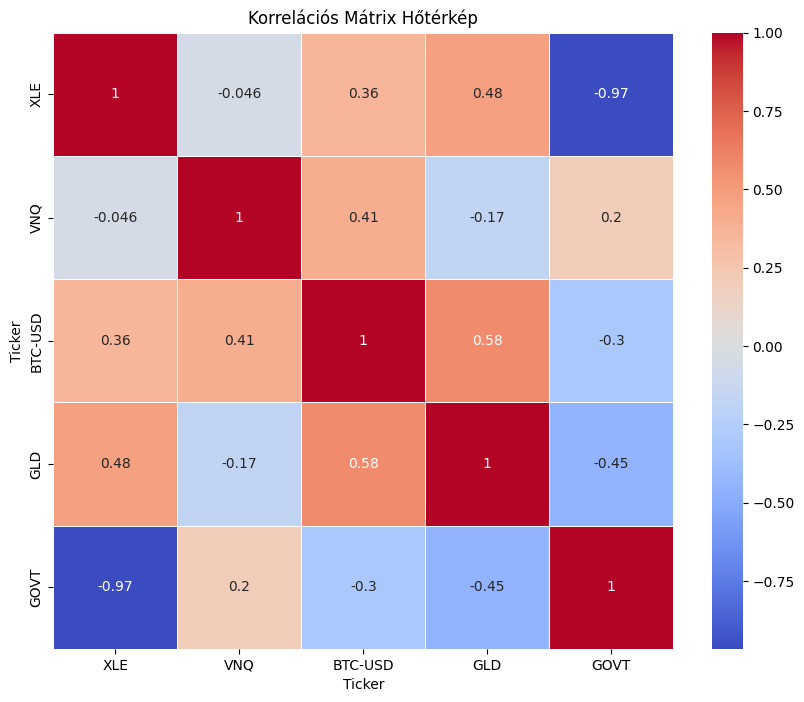

In [ ]:
df_comb_corr = df_combined.corr()
# Létrehozzuk a hőtérképet
plt.figure(figsize=(10, 8))
sns.heatmap(df_comb_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelációs Mátrix Hőtérkép')
plt.show()

In [ ]:
# Határérték az erős korrelációra
threshold = 0.5

# Oszlopnevek lekérése
columns = df_comb_corr.columns

# Lehetséges hármas kombinációk létrehozása
combs = combinations(columns, 4)

# Hármas kombinációk szűrése a korrelációs értékek alapján
selected_combinations = []
for comb in combs:
    if all(df_comb_corr.loc[comb[i], comb[j]] < threshold for i in range(4) for j in range(i+1, 4)):
        selected_combinations.append(comb)

# Megjelenítjük azokat a hármas kombinációkat, amelyek megfelelnek a feltételnek
print("Négyes kombinációk, amelyek korrelációi 0.45 alatt vannak:")
print(selected_combinations)

Négyes kombinációk, amelyek korrelációi 0.45 alatt vannak:
[('XLE', 'VNQ', 'BTC-USD', 'GOVT'), ('XLE', 'VNQ', 'GLD', 'GOVT')]


In [ ]:
# Bitcoint tartalmazó 4-es: 'XLE', 'XLU', 'GOVT', 'BTC-USD'
# 0.45 alatti threshold esetén az alábbi kombináció lehetséges: ('XLU', 'XLY', 'GOVT', 'GLD')

First version: XOM SO GOVT BTC-USD

Second version: SO, GOVT, AAAU, AMZN

VNQ - PLD
VOX - GOOGL
XLU - SO
XLV - LLY
GOVT
GLD
BTC-USD

In [ ]:
# top_picks = yf.download('PLD GOOGL SO LLY GOVT GLD BTC-USD', start='2020-01-01', group_by='ticker')
top_picks = yf.download('XOM PLD GOVT AAAU BTC-USD', start='2020-01-01', group_by='ticker')

[*********************100%%**********************]  5 of 5 completed


In [ ]:
top_picks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1679 entries, 2020-01-01 to 2024-08-05
Freq: D
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (PLD, Open)           1155 non-null   float64
 1   (PLD, High)           1155 non-null   float64
 2   (PLD, Low)            1155 non-null   float64
 3   (PLD, Close)          1155 non-null   float64
 4   (PLD, Adj Close)      1155 non-null   float64
 5   (PLD, Volume)         1155 non-null   float64
 6   (LLY, Open)           1155 non-null   float64
 7   (LLY, High)           1155 non-null   float64
 8   (LLY, Low)            1155 non-null   float64
 9   (LLY, Close)          1155 non-null   float64
 10  (LLY, Adj Close)      1155 non-null   float64
 11  (LLY, Volume)         1155 non-null   float64
 12  (BTC-USD, Open)       1679 non-null   float64
 13  (BTC-USD, High)       1679 non-null   float64
 14  (BTC-USD, Low)        1679 non-null   float64


In [ ]:
df_filtered = top_picks.xs('Close', level=1, axis=1)

# Az oszlopok átnevezése a ticker nevére
df_filtered.columns = df_filtered.columns.get_level_values(0)

# Eredmény megjelenítése
print(df_filtered)

Ticker             PLD         XOM       AAAU       GOVT       BTC-USD
Date                                                                  
2020-01-01         NaN         NaN        NaN        NaN   7200.174316
2020-01-02   88.400002   70.900002  15.250000  25.990000   6985.470215
2020-01-03   89.389999   70.330002  15.450000  26.120001   7344.884277
2020-01-04         NaN         NaN        NaN        NaN   7410.656738
2020-01-05         NaN         NaN        NaN        NaN   7411.317383
...                ...         ...        ...        ...           ...
2024-08-01  127.720001  116.949997  24.170000  23.040001  65357.500000
2024-08-02  123.980003  116.879997  24.120001  23.350000  61415.066406
2024-08-03         NaN         NaN        NaN        NaN  60680.093750
2024-08-04         NaN         NaN        NaN        NaN  58116.976562
2024-08-05  119.040001  114.820000  23.860001  23.385000  52780.203125

[1679 rows x 5 columns]


In [ ]:
# Hétvégi BTC árak kiszűrése

# Sorok kiszűrése, ahol a 'GOVT' oszlopban null értékek vannak
filtered_df = df_filtered.dropna(subset=['AAAU'])

# Szűrt DataFrame megjelenítése
print("\nSzűrt DataFrame:")
print(filtered_df)


Szűrt DataFrame:
Ticker             PLD         XOM       AAAU       GOVT       BTC-USD
Date                                                                  
2020-01-02   88.400002   70.900002  15.250000  25.990000   6985.470215
2020-01-03   89.389999   70.330002  15.450000  26.120001   7344.884277
2020-01-06   89.040001   70.870003  15.620000  26.090000   7769.219238
2020-01-07   88.470001   70.290001  15.680000  26.040001   8163.692383
2020-01-08   88.949997   69.230003  15.560000  26.000000   8079.862793
...                ...         ...        ...        ...           ...
2024-07-30  126.089996  118.169998  23.820000  22.879999  66201.015625
2024-07-31  126.050003  118.589996  24.240000  23.010000  64619.250000
2024-08-01  127.720001  116.949997  24.170000  23.040001  65357.500000
2024-08-02  123.980003  116.879997  24.120001  23.350000  61415.066406
2024-08-05  119.040001  114.820000  23.860001  23.385000  52780.203125

[1155 rows x 5 columns]


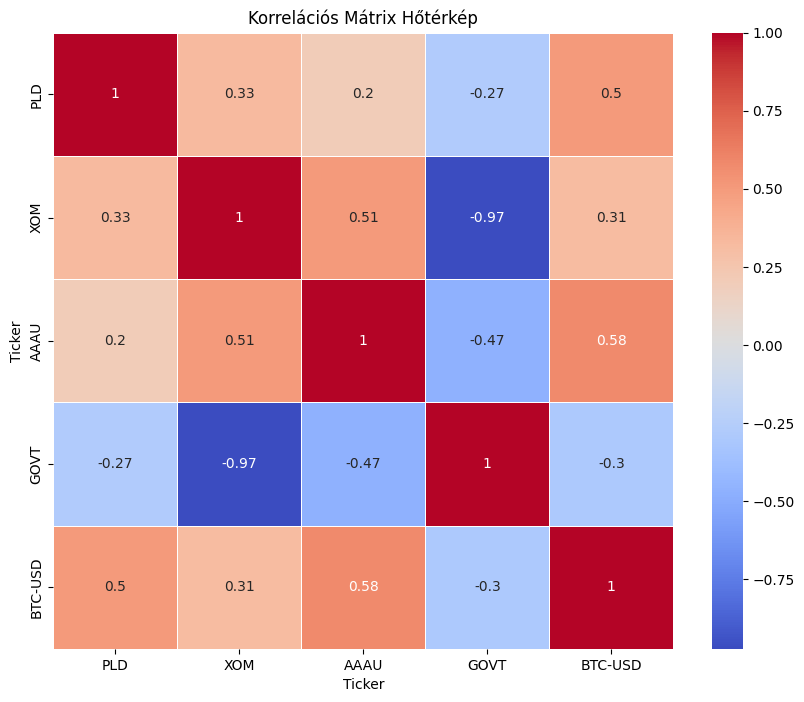

In [ ]:
df_corr_1 = df_filtered.corr()
# Létrehozzuk a hőtérképet
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelációs Mátrix Hőtérkép')
plt.show()

In [ ]:
# Határérték az erős korrelációra
threshold = 0.6

# Oszlopnevek lekérése
columns = df_corr_1.columns

# Lehetséges hármas kombinációk létrehozása
combs = combinations(columns, 4)

# Hármas kombinációk szűrése a korrelációs értékek alapján
selected_combinations = []
for comb in combs:
    if all(abs(df_corr_1.loc[comb[i], comb[j]]) < threshold for i in range(4) for j in range(i+1, 4)):
        selected_combinations.append(comb)

# Megjelenítjük azokat a hármas kombinációkat, amelyek megfelelnek a feltételnek
print("Négyes kombinációk, amelyek korrelációi 0.58 alatt vannak:")
print(selected_combinations)

Négyes kombinációk, amelyek korrelációi 0.58 alatt vannak:
[('PLD', 'XOM', 'AAAU', 'BTC-USD'), ('PLD', 'AAAU', 'GOVT', 'BTC-USD')]


In [ ]:
filtered_df[['PLD', 'XOM', 'AAAU', 'BTC-USD']]

Ticker,PLD,XOM,AAAU,BTC-USD
Date,,,,
2020-01-02,88.400002,70.900002,15.250000,6985.470215
2020-01-03,89.389999,70.330002,15.450000,7344.884277
2020-01-06,89.040001,70.870003,15.620000,7769.219238
2020-01-07,88.470001,70.290001,15.680000,8163.692383
2020-01-08,88.949997,69.230003,15.560000,8079.862793
...,...,...,...,...
2024-07-30,126.089996,118.169998,23.820000,66201.015625
2024-07-31,126.050003,118.589996,24.240000,64619.250000
2024-08-01,127.720001,116.949997,24.170000,65357.500000


In [ ]:
selected_portfolio = filtered_df[['PLD', 'XOM', 'AAAU', 'BTC-USD']]

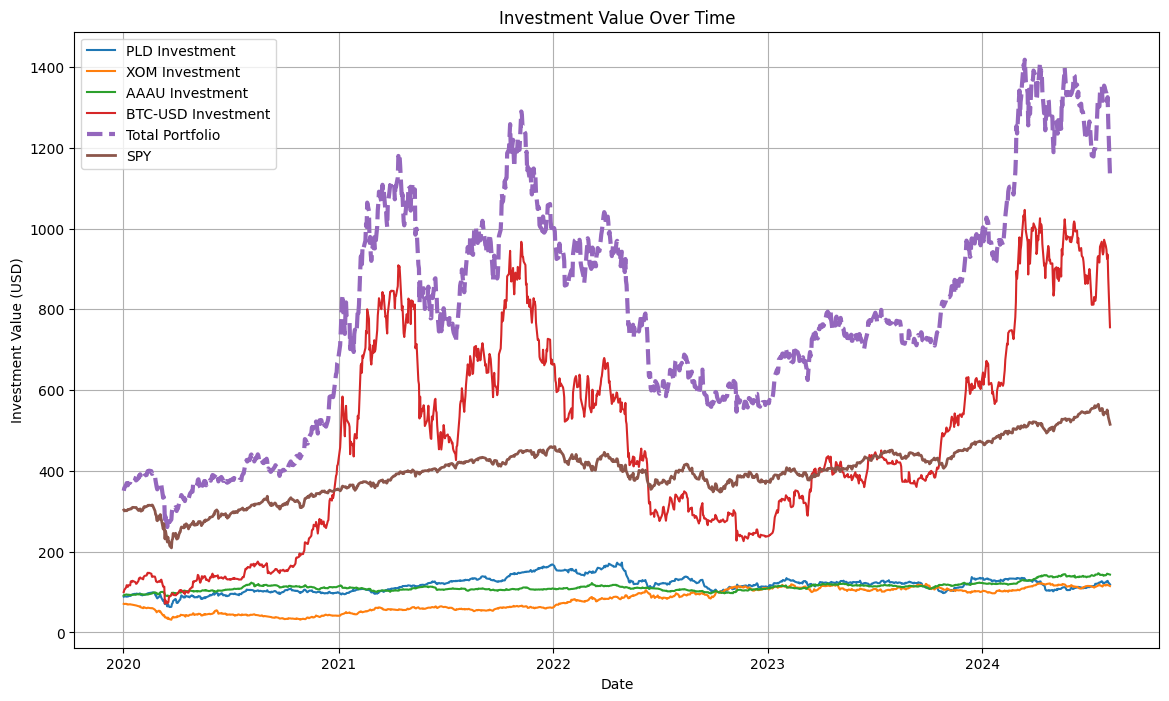

In [ ]:
# Kezdeti befektetés összege
initial_investment = 100

# Kezdeti árak
initial_prices = selected_portfolio.iloc[0]

# Az egyes tickerekre vonatkozó befektetési értékek kiszámítása időben
investment_values = pd.DataFrame(index=selected_portfolio.index)
tickers = ['PLD', 'XOM', 'AAAU', 'BTC-USD']

for ticker in tickers:
    if ticker == 'BTC-USD':
        # BTC-USD esetén tört részvényszám is lehet
        shares = initial_investment / initial_prices[ticker]
    else:
        # Egész számú részvények vásárlása
        shares = initial_investment // initial_prices[ticker]

    investment_values[ticker] = selected_portfolio[ticker] * shares

# A teljes portfólió értékének kiszámítása időben
portfolio_value = investment_values.sum(axis=1)

# Adatok vizualizálása
plt.figure(figsize=(14, 8))

# Egyes tickerek ábrázolása
for ticker in tickers:
    plt.plot(investment_values.index, investment_values[ticker], label=f'{ticker} Investment')

# Teljes portfólió ábrázolása
plt.plot(portfolio_value.index, portfolio_value, label='Total Portfolio', linewidth=3, linestyle='--')

# SP500 ETF
plt.plot(sp500_hist.index, sp500_hist, label='SPY', linewidth=2, linestyle='-')

# Bond ETF

plt.title('Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
investment_values

,PLD,XOM,AAAU,BTC-USD
Date,,,,
2020-01-02,88.400002,70.900002,91.500000,100.000000
2020-01-03,89.389999,70.330002,92.699999,105.145166
2020-01-06,89.040001,70.870003,93.719999,111.219703
2020-01-07,88.470001,70.290001,94.080002,116.866755
2020-01-08,88.949997,69.230003,93.360003,115.666699
...,...,...,...,...
2024-07-30,126.089996,118.169998,142.919998,947.695911
2024-07-31,126.050003,118.589996,145.439999,925.052259
2024-08-01,127.720001,116.949997,145.020000,935.620624


In [ ]:
# Kezdeti befektetés
initial_investment = 400 * 295  # Tegyük fel, hogy 10 000 HUF-t fektettünk be

# Állampapír éves hozama
annual_yield = 4.95 / 100

# Évek száma
years = 2024 - 2020 + 1  # 2020-tól 2024-ig

# A befektetés értékének kiszámítása az évek során
investment_value = initial_investment * (1 + annual_yield) ** years

print(f"A befektetés értéke a kezdetekkor: {initial_investment:.0f}, 2024-ben: {investment_value:.0f} HUF, a hozama pedig {((investment_value/initial_investment)-1)*100:.2f}%")

A befektetés értéke a kezdetekkor: 118000, 2024-ben: 150243 HUF, a hozama pedig 27.32%


In [ ]:
portfolio_value.pct_change(periods=len(portfolio_value)-1).tail(1)
actual_value = portfolio_value.tail(1).values[0] * 295
initial_inv = investment_values.iloc[0].sum() * 295
print(f"A befektetés értéke a kezdetekkor: {initial_inv:.0f}, 2024-ben: {actual_value:.0f} HUF, a hozama pedig {((actual_value/initial_inv)-1)*100:.2f}%")

A befektetés értéke a kezdetekkor: 103486, 2024-ben: 334114 HUF, a hozama pedig 222.86%


In [ ]:
# Kezdeti befektetés
initial_investment

# Befektetés értéke 2024-ben
investment_value

# Inflációs ráták Magyarországon
inflation_rates = {
    2020: 3.3,
    2021: 5.1,
    2022: 14.5,
    2023: 17.6,
    2024: 4.0  # Feltételezett érték
}

# Inflációs faktorok kiszámítása
cumulative_inflation_factor = 1.0
for year, inflation_rate in inflation_rates.items():
    cumulative_inflation_factor *= (1 + inflation_rate / 100)

# Inflációval korrigált érték kiszámítása
inflation_adjusted_final_value = investment_value / cumulative_inflation_factor

print(f"A befektetés inflációval korrigált értéke 2024-ben: {inflation_adjusted_final_value:.2f} HUF")


A befektetés inflációval korrigált értéke 2024-ben: 98820.04 HUF


In [ ]:
# Kezdeti befektetés
initial_inv

# Befektetés értéke 2024-ben
actual_value

# Inflációs ráták Magyarországon
inflation_rates = {
    2020: 3.3,
    2021: 5.1,
    2022: 14.5,
    2023: 18.1,
    2024: 4  # Feltételezett érték
}

# Inflációs faktorok kiszámítása
cumulative_inflation_factor = 1.0
for year, inflation_rate in inflation_rates.items():
    cumulative_inflation_factor *= (1 + inflation_rate / 100)

# Inflációval korrigált érték kiszámítása
inflation_adjusted_final_value = actual_value / cumulative_inflation_factor

print(f"A befektetés inflációval korrigált értéke 2024-ben: {inflation_adjusted_final_value:.2f} HUF")

A befektetés inflációval korrigált értéke 2024-ben: 218828.28 HUF


In [ ]:
!git status